In [87]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
dataset = pd.read_csv('dataset.csv', header = None)

In [89]:
print(dataset.shape)

(100, 4)


In [90]:
print(dataset.head())

   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


In [91]:
#divide the dataset into X and Y
    
theta = [ 0.0, 0.0, 0.0 ]
alpha = 0.5

X1 = dataset.iloc[:,1].values
X2 = dataset.iloc[:,2].values
Y = dataset.iloc[:,3].values

m = len(Y)

In [92]:
#normalizing the dataset

X1_norm = (X1 - np.mean(X1)) / (np.max(X1) - np.min(X1))
X2_norm = (X2 - np.mean(X2)) / (np.max(X2) - np.min(X2))


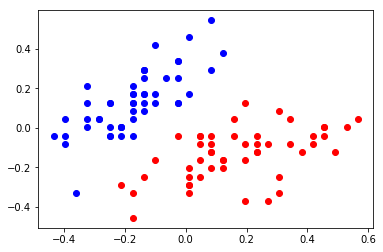

In [93]:
#visualizing the dataset

X_pos = []
Y_pos = []

X_neg = []
Y_neg = []

for i in range(len(X1_norm)):
    if(Y[i] == 1):
        X_pos.append(X1_norm[i])
        Y_pos.append(X2_norm[i])
    else:
        X_neg.append(X1_norm[i])
        Y_neg.append(X2_norm[i])

plt.plot(X_pos, Y_pos, 'bo')
plt.plot(X_neg, Y_neg, 'ro')
plt.show()

In [94]:
#running Gradient Descent using Normal Equation method (Bullshit! Doesn't work this way)

Ypad = np.c_[ Y ];

X = np.c_[ np.ones(100), X1_norm, X2_norm ];
Xt = np.transpose(X)

XtX = np.dot(Xt, X)

XtX_inv = np.linalg.inv(XtX)

theta = np.dot(np.dot(XtX_inv, Xt), Ypad)
print(theta)

[[ 0.5       ]
 [-1.30501711]
 [ 1.42385254]]


In [95]:
#function for obtaining Cost Function

def cost(X1, X2, Y, m, theta):
    squared_sum=0.0
    for i in range(m):
        hypothesis = 1/(1 + np.exp(-(theta[0] + theta[1]*X1[i] + theta[2]*X2[i])))
        squared_sum = squared_sum + (-Y[i]*np.log(hypothesis) - (1 - Y[i])*(np.log(1 - hypothesis)));
    cost = (-1.0/(m))*squared_sum;
    return cost;


In [96]:
#function for summing-up them hypotheses

def hypothesis_summation(X1, X2, Y, term, m):
    sum = 0
    for i in range(m):
        if(term == 1):
            sum = sum + ((1/(1 + np.exp(-(theta[0] + theta[1]*X1[i] + theta[2]*X2[i]))) - Y[i]))
        elif(term == 2):
            sum = sum + ((1/(1 + np.exp(-(theta[0] + theta[1]*X1[i] + theta[2]*X2[i]))) - Y[i]))*X1[i]
        else:
            sum = sum + ((1/(1 + np.exp(-(theta[0] + theta[1]*X1[i] + theta[2]*X2[i]))) - Y[i]))*X2[i]
    return sum;

In [97]:
#running Gradient Descent

checkpoint = 0

while(True):
    temp0 = theta[0] - alpha*hypothesis_summation(X1_norm, X2_norm, Y, 1, m);
    temp1 = theta[1] - alpha*hypothesis_summation(X1_norm, X2_norm, Y, 2, m);
    temp2 = theta[2] - alpha*hypothesis_summation(X1_norm, X2_norm, Y, 3, m);
    theta[0] = temp0;
    theta[1] = temp1;
    theta[2] = temp2;
    checkpoint = checkpoint + 1
    if(checkpoint%100000 == 0):
        print("Reached Checkpoint ", checkpoint/100000)
        print(theta)
    if(cost(X1_norm, X2_norm, Y, m, theta)<0.00001):
        break;
print(theta);
print(checkpoint)
print(cost(X1_norm, X2_norm, Y, m, theta))

[[-5.35080613]
 [-4.60300604]
 [ 4.02589441]]
1
[-2.01789089]


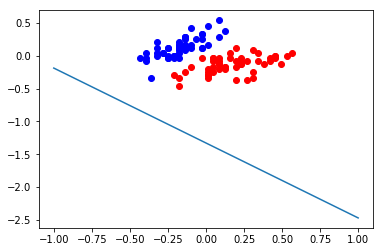

In [101]:
x = np.linspace(-1, 1, 1000)
y = (-5.35080613 - 4.60300604*x)/4.02589441
plt.plot(x, y)
plt.plot(X_pos, Y_pos, 'bo')
plt.plot(X_neg, Y_neg, 'ro')
plt.show()